In [ ]:
!git clone https://github.com/ZhongGuoRenMinYinHang/ai4sci_homework.git
!unzip /ai4sci_homework/Homework-1/Homework-1-Data.zip -d /ai4sci_homework/Homework-1/

!cd /ai4sci_homework
!conda create -n ai4sci python=3.12
!conda activate ai4sci
%pip install -r requirements.txt

BDT Accuracy: 0.9446
BDT AUC: 0.9850


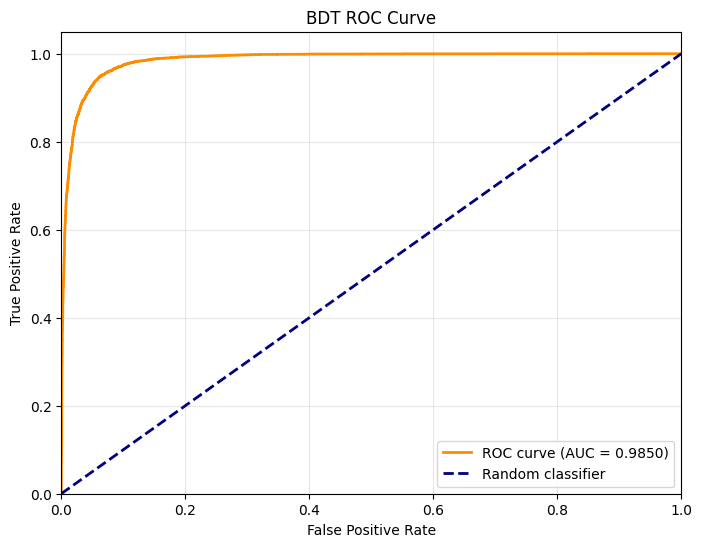

In [ ]:
#problem A
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.layers import Dropout


data = np.loadtxt('Homework-1-Data.txt', skiprows=1)
labels = np.concatenate([np.ones(36499), np.zeros(93565)])
Accuracy_comparison = ""
auc_comparison = ""

X_train, X_test, y_train, y_test = train_test_split(
    data, labels, 
    test_size=0.2, 
    random_state=42, 
    stratify=labels
)

model = XGBClassifier(
    n_estimators=100,
    max_depth=10,
    learning_rate=0.1,
    colsample_bytree=0.8,
    subsample=0.8,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_score = auc(fpr, tpr)

def results_display(model_name: str):
    global Accuracy_comparison, auc_comparison

    print(model_name+f" Accuracy: {accuracy:.4f}")
    print(model_name+f" AUC: {auc_score:.4f}")
    Accuracy_comparison += model_name+f" Accuracy: {accuracy:.4f}\n"
    auc_comparison += model_name+f" AUC: {auc_score:.4f}\n"

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(model_name + ' ROC Curve')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()

    if(model_name == "BDT"):
        return
    
    plt.plot(model_history.history['loss'], label='Training Loss')
    plt.plot(model_history.history['val_loss'], label='Validation Loss')
    plt.title(model_name + ' Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True, alpha=0.3)

results_display("BDT")

Top 10 F-score:
 1. Feature 16: 0.192785
 2. Feature  0: 0.182926
 3. Feature 31: 0.059325
 4. Feature  2: 0.056802
 5. Feature 26: 0.029788
 6. Feature 12: 0.026380
 7. Feature 15: 0.024009
 8. Feature 22: 0.021059
 9. Feature  1: 0.021045
10. Feature 11: 0.018607


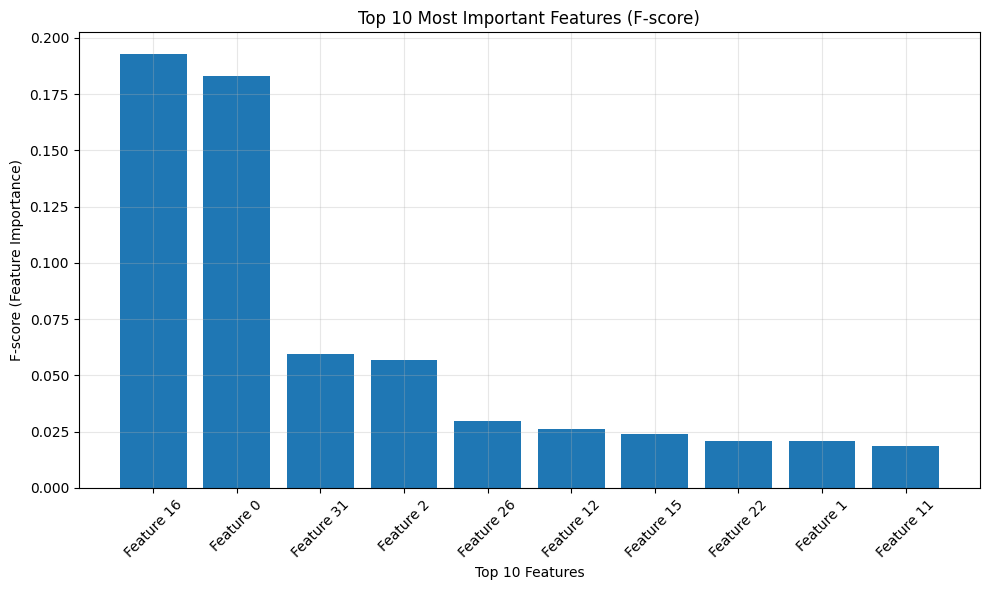


Most Important Feature: Feature 16
F-score: 0.192785


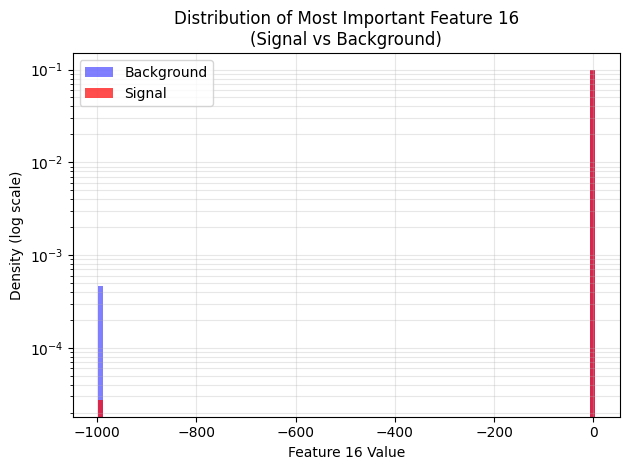


Feature 16 Statistics:
Signal (label=1):
  Mean: 0.5630

Background (label=0):
  Mean: -4.3925

 Signal tends to have HIGHER values than background


In [5]:
#problem B
feature_importance = model.feature_importances_
top_10_indices = np.argsort(feature_importance)[-10:][::-1]

print("Top 10 F-score:")
for i, idx in enumerate(top_10_indices):
    print(f"{i+1:2d}. Feature {idx:2d}: {feature_importance[idx]:.6f}")

plt.figure(figsize=(10, 6))
plt.bar(range(10), feature_importance[top_10_indices])
plt.xlabel('Top 10 Features')
plt.ylabel('F-score (Feature Importance)')
plt.title('Top 10 Most Important Features (F-score)')
plt.xticks(range(10), [f'Feature {idx}' for idx in top_10_indices], rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

most_important_idx = top_10_indices[0]
most_important_score = feature_importance[most_important_idx]
print(f"\nMost Important Feature: Feature {most_important_idx}")
print(f"F-score: {most_important_score:.6f}")

feature_values = X_test[:, most_important_idx]
signal_values = feature_values[y_test == 1]
background_values = feature_values[y_test == 0]

import warnings
import logging
warnings.filterwarnings('ignore', category=UserWarning, module='matplotlib')
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

min_val = np.min(feature_values)
max_val = np.max(feature_values)
bins = np.linspace(min_val, max_val, 101)
plt.hist(background_values, bins=bins, alpha=0.5, label='Background', color='blue', density=True, histtype='stepfilled')
plt.hist(signal_values, bins=bins, alpha=0.7, label='Signal', color='red', density=True, histtype='stepfilled')
plt.xlabel(f'Feature {most_important_idx} Value')
plt.ylabel('Density (log scale)')
plt.yscale('log')
plt.title(f'Distribution of Most Important Feature {most_important_idx}\n(Signal vs Background)')
plt.legend()
plt.grid(True, alpha=0.3, which='both')
plt.tight_layout()
plt.show()

print(f"\nFeature {most_important_idx} Statistics:")
print(f"Signal (label=1):")
print(f"  Mean: {np.mean(signal_values):.4f}")
print(f"\nBackground (label=0):")
print(f"  Mean: {np.mean(background_values):.4f}")
print("\n Signal tends to have HIGHER values than background")


In [ ]:
#problem C
from urllib.parse import _ResultMixinStr
tf.random.set_seed(42)
np.random.seed(42)

model = Sequential([
    Dense(128, activation='tanh', input_shape=(50,)),
    Dense(128, activation='tanh'),
    Dense(128, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

model_history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=50,
    validation_data=(X_test, y_test),
    verbose=1
)

y_pred = (y_pred_proba > 0.5).astype(int)
y_pred_proba = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_score = auc(fpr, tpr)

results_display("NN+tanh")

In [ ]:
#problem D
print("As seen below, without standardization, using the ReLU activation function makes it completely impossible to train.\n"+
"Because the data isn't standardized, the gradient is too large to train.")

model = Sequential([
    Dense(128, activation='relu', input_shape=(50,)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

model_history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=50,
    validation_data=(X_test, y_test),
    verbose=1
)

y_pred = (y_pred_proba > 0.5).astype(int)
y_pred_proba = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_score = auc(fpr, tpr)

results_display("NN+ReLU")

In [ ]:
#problem E
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = Sequential([
    Dense(128, activation='relu', input_shape=(50,)),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

model_history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=50,
    validation_data=(X_test, y_test),
    verbose=1
)

y_pred = (y_pred_proba > 0.5).astype(int)
y_pred_proba = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_score = auc(fpr, tpr)

results_display("NN+ReLU+Scaler+Adam")
print(Accuracy_comparison+"\n")
print(auc_comparison)

In [ ]:
#problem F
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau

model = Sequential([
    Dense(200, activation='relu', input_shape=(50,), kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(200, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(200, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(200, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(200, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(200, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(200, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(200, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(200, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(200, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.01), 
    loss=BinaryCrossentropy(),
    metrics=['accuracy']
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7,
    verbose=1
)

model_history = model.fit(
    X_train, y_train,  
    batch_size=128,
    epochs=200,
    validation_data=(X_test, y_test),
    callbacks=[reduce_lr],
    verbose=1
)

y_pred_proba = model.predict(X_test).flatten()
y_pred = (y_pred_proba > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_score = auc(fpr, tpr)

results_display("Deep_NN+ReLU+L2+Adam+LR_Decay")
print("I use a deeper NN to achieve better fitting, and apply L2 regularization to suppress overfitting.")

KeyboardInterrupt: 

In [ ]:
#summary
print(Accuracy_comparison+"\n")
print(auc_comparison)